# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Чтобы при проверке были те же результаты

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [x] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [x] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [x] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [x] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [5]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [6]:
df_train.columns[df_train.isna().any()].tolist()

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [7]:
df_test.columns[df_test.isna().any()].tolist()

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [8]:
df_train.duplicated().sum()

np.int64(985)

In [9]:
df_test.duplicated().sum()

np.int64(62)

In [10]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")
profile.to_file("dashboard.html")

/Users/lev_k/HSE/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 312.40it/s]


Мы обнаружили пропуски. Давайте избавимся от них.

- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [11]:
df_train['mileage'].str.contains('km/kg').sum()

79

In [12]:
df_test['mileage'].str.contains('km/kg').sum()

9

В тестовом и тренировочном наборах есть значения `mileage`, которые измеряются в `km/kg`. Таких значений не много (79 в трейне и 9 в тесте), можно сказать, что они мусорные, поэтому можно эти значения заменить на NaN и заполнить медианой

In [13]:
for df in (df_train, df_test):
    df.loc[df['mileage'].str.contains('km/kg', na=False), 'mileage'] = np.nan

In [14]:
# Предобработка данных

import re

def extract_nm(value):
    if pd.isnull(value):
        return np.nan
    value = value.lower()

    nm_match = re.search(r'(\d+\.?\d*)nm', value)
    if nm_match:
        return float(nm_match.group(1))
    
    # Если Nm нет, ищем kgm и переводим в Nm
    kgm_match = re.search(r'(\d+\.?\d*)kgm', value)
    if kgm_match:
        return float(kgm_match.group(1)) * 9.8
    return np.nan

def extract_rpm(value):
    if pd.isnull(value):
        return np.nan
    value = value.lower()
    
    # Если есть диапазон rpm, берем среднее
    range_match = re.search(r'(\d+)-(\d+)rpm', value)
    if range_match:
        start, end = map(int, range_match.groups())
        return (start + end) / 2

    rpm_match = re.search(r'(\d+)rpm', value)
    if rpm_match:
        return int(rpm_match.group(1))
    return np.nan


for df in (df_train, df_test):
    # В mileage, убираем единицы измерения из строк и добавляем в название столбца
    df['mileage'] = df['mileage'].str.removesuffix('kmpl')
    df['mileage_kmpl'] = pd.to_numeric(df['mileage'], errors='coerce', downcast='float')
    df.drop(columns=['mileage'], inplace=True)

    # В engine, убираем единицы измерения из строк и добавляем в название столбца
    df['engine'] = df['engine'].str.removesuffix(' CC')
    df['engine_cc'] = pd.to_numeric(df['engine'], errors='coerce', downcast='float')
    df.drop(columns=['engine'], inplace=True)
    
    # В max_power, убираем единицы измерения из строк и добавляем в название столбца
    df['max_power'] = df['max_power'].str.removesuffix(' bhp')
    df['max_power_bhp'] = pd.to_numeric(df['max_power'], errors='coerce', downcast='float')
    df.drop(columns=['max_power'], inplace=True)
    
    # В torque, разбиваем на 2 числовых столбца (torque_nm, rpm), rpm важно,
    # т.к. тесно связанно с крутящим моментом, вместе они они определяют мощнось двигателя
    df['torque_nm'] = df['torque'].apply(extract_nm)
    df['rpm'] = df['torque'].apply(extract_rpm)
    df.drop(columns=['torque'], inplace=True)

In [15]:
# Заполнение пропусков медианой
for column in ['mileage_kmpl', 'engine_cc', 'max_power_bhp', 'torque_nm', 'rpm', 'seats']:
    median = df_train[column].median()
    df_train[column] = df_train[column].fillna(median)
    df_test[column] = df_test[column].fillna(median)

### **Задание 2 (0.5 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [x] Отобразите такие объекты (0.15 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [16]:
features = df_train.drop(columns=['selling_price']).columns

In [17]:
df_train.duplicated(subset=features).sum()

np.int64(1159)

In [18]:
df_train[df_train.duplicated(subset=features)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_nm,rpm
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,5.0,18.900000,1197.0,82.000000,114.0,4000.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,5.0,18.600000,1197.0,85.800003,114.0,4000.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,5.0,19.100000,1197.0,85.800003,114.0,4000.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,5.0,13.600000,1999.0,177.000000,430.0,2125.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,5.0,22.370001,2487.0,214.559998,202.0,4400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,5.0,18.000000,995.0,62.000000,90.3,4200.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,5.0,24.400000,1498.0,98.629997,215.0,2375.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,5.0,26.590000,1248.0,74.000000,190.0,2000.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,5.0,23.570000,1396.0,70.000000,140.0,2400.0


In [19]:
df_train = df_train.drop_duplicates(subset=features, keep='first')

In [20]:
df_train = df_train.reset_index(drop=True)

In [21]:
# Изменил кол-во столбцов, т.к. обработал torque вместо удаления, и получилось 2 новых столбца (torque_nm, rpm) взамен одного
assert df_train.shape == (5840, 14)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque`` (Этот столбец обработал)


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

##### Все пункты были выполнены в Задании 1 (`torque` был обработан и разделен на 2 столбца (`torque_nm`, `rpm`))

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.

In [22]:
for df in (df_train, df_test):
    df['engine_cc'] = df['engine_cc'].astype('int')
    df['seats'] = df['seats'].astype('int')

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   seats          5840 non-null   int64  
 9   mileage_kmpl   5840 non-null   float32
 10  engine_cc      5840 non-null   int64  
 11  max_power_bhp  5840 non-null   float32
 12  torque_nm      5840 non-null   float64
 13  rpm            5840 non-null   float64
dtypes: float32(2), float64(2), int64(5), object(5)
memory usage: 593.3+ KB


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   seats          1000 non-null   int64  
 9   mileage_kmpl   1000 non-null   float32
 10  engine_cc      1000 non-null   int64  
 11  max_power_bhp  1000 non-null   float32
 12  torque_nm      1000 non-null   float64
 13  rpm            1000 non-null   float64
dtypes: float32(2), float64(2), int64(5), object(5)
memory usage: 101.7+ KB


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [25]:
print('Train\n')
display(df_train.describe(include='number'))
display(df_train.describe(include='object'))

Train



,year,selling_price,km_driven,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_nm,rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,5.426712,19.394732,1429.448973,87.910774,171.658961,2809.013784
std,4.095622,5.354320e+05,6.007114e+04,0.982344,3.919005,485.662834,31.639584,82.154859,923.787300
min,1983.000000,2.999900e+04,1.000000e+00,2.000000,0.000000,624.000000,0.000000,47.040000,500.000000
25%,2011.000000,2.500000e+05,3.900000e+04,5.000000,17.000000,1197.000000,68.000000,113.000000,2000.000000
50%,2014.000000,4.050000e+05,7.000000e+04,5.000000,19.299999,1248.000000,81.860001,170.000000,2400.000000
75%,2017.000000,6.400000e+05,1.000000e+05,5.000000,22.070000,1498.000000,99.000000,200.000000,3500.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,42.000000,3604.000000,400.000000,789.000000,5000.000000


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [26]:
print('Test\n')
display(df_test.describe(include='number'))
display(df_test.describe(include='object'))

Test



,year,selling_price,km_driven,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_nm,rpm
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,5.403000,19.324192,1454.87600,90.844330,175.034970,2845.251000
std,4.012149,7.585539e+05,48486.218662,0.912921,3.911901,521.99574,34.892708,87.322236,946.292977
min,1995.000000,3.100000e+04,1303.000000,4.000000,0.000000,624.00000,34.200001,48.000000,500.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000,16.587500,1197.00000,69.000000,112.000000,2125.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000,19.299999,1248.00000,82.424999,170.000000,2400.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000,22.299999,1582.00000,102.000000,200.000000,3762.500000
max,2020.000000,6.000000e+06,375000.000000,9.000000,28.400000,3604.00000,280.000000,620.000000,5000.000000


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [27]:
# Изменил кол-во столбцов, т.к. обработал torque вместо удаления, и получилось 2 новых столбца (torque_nm, rpm) взамен одного
assert df_train.shape == (5840, 14)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [28]:
%matplotlib inline

#### Шаг 1

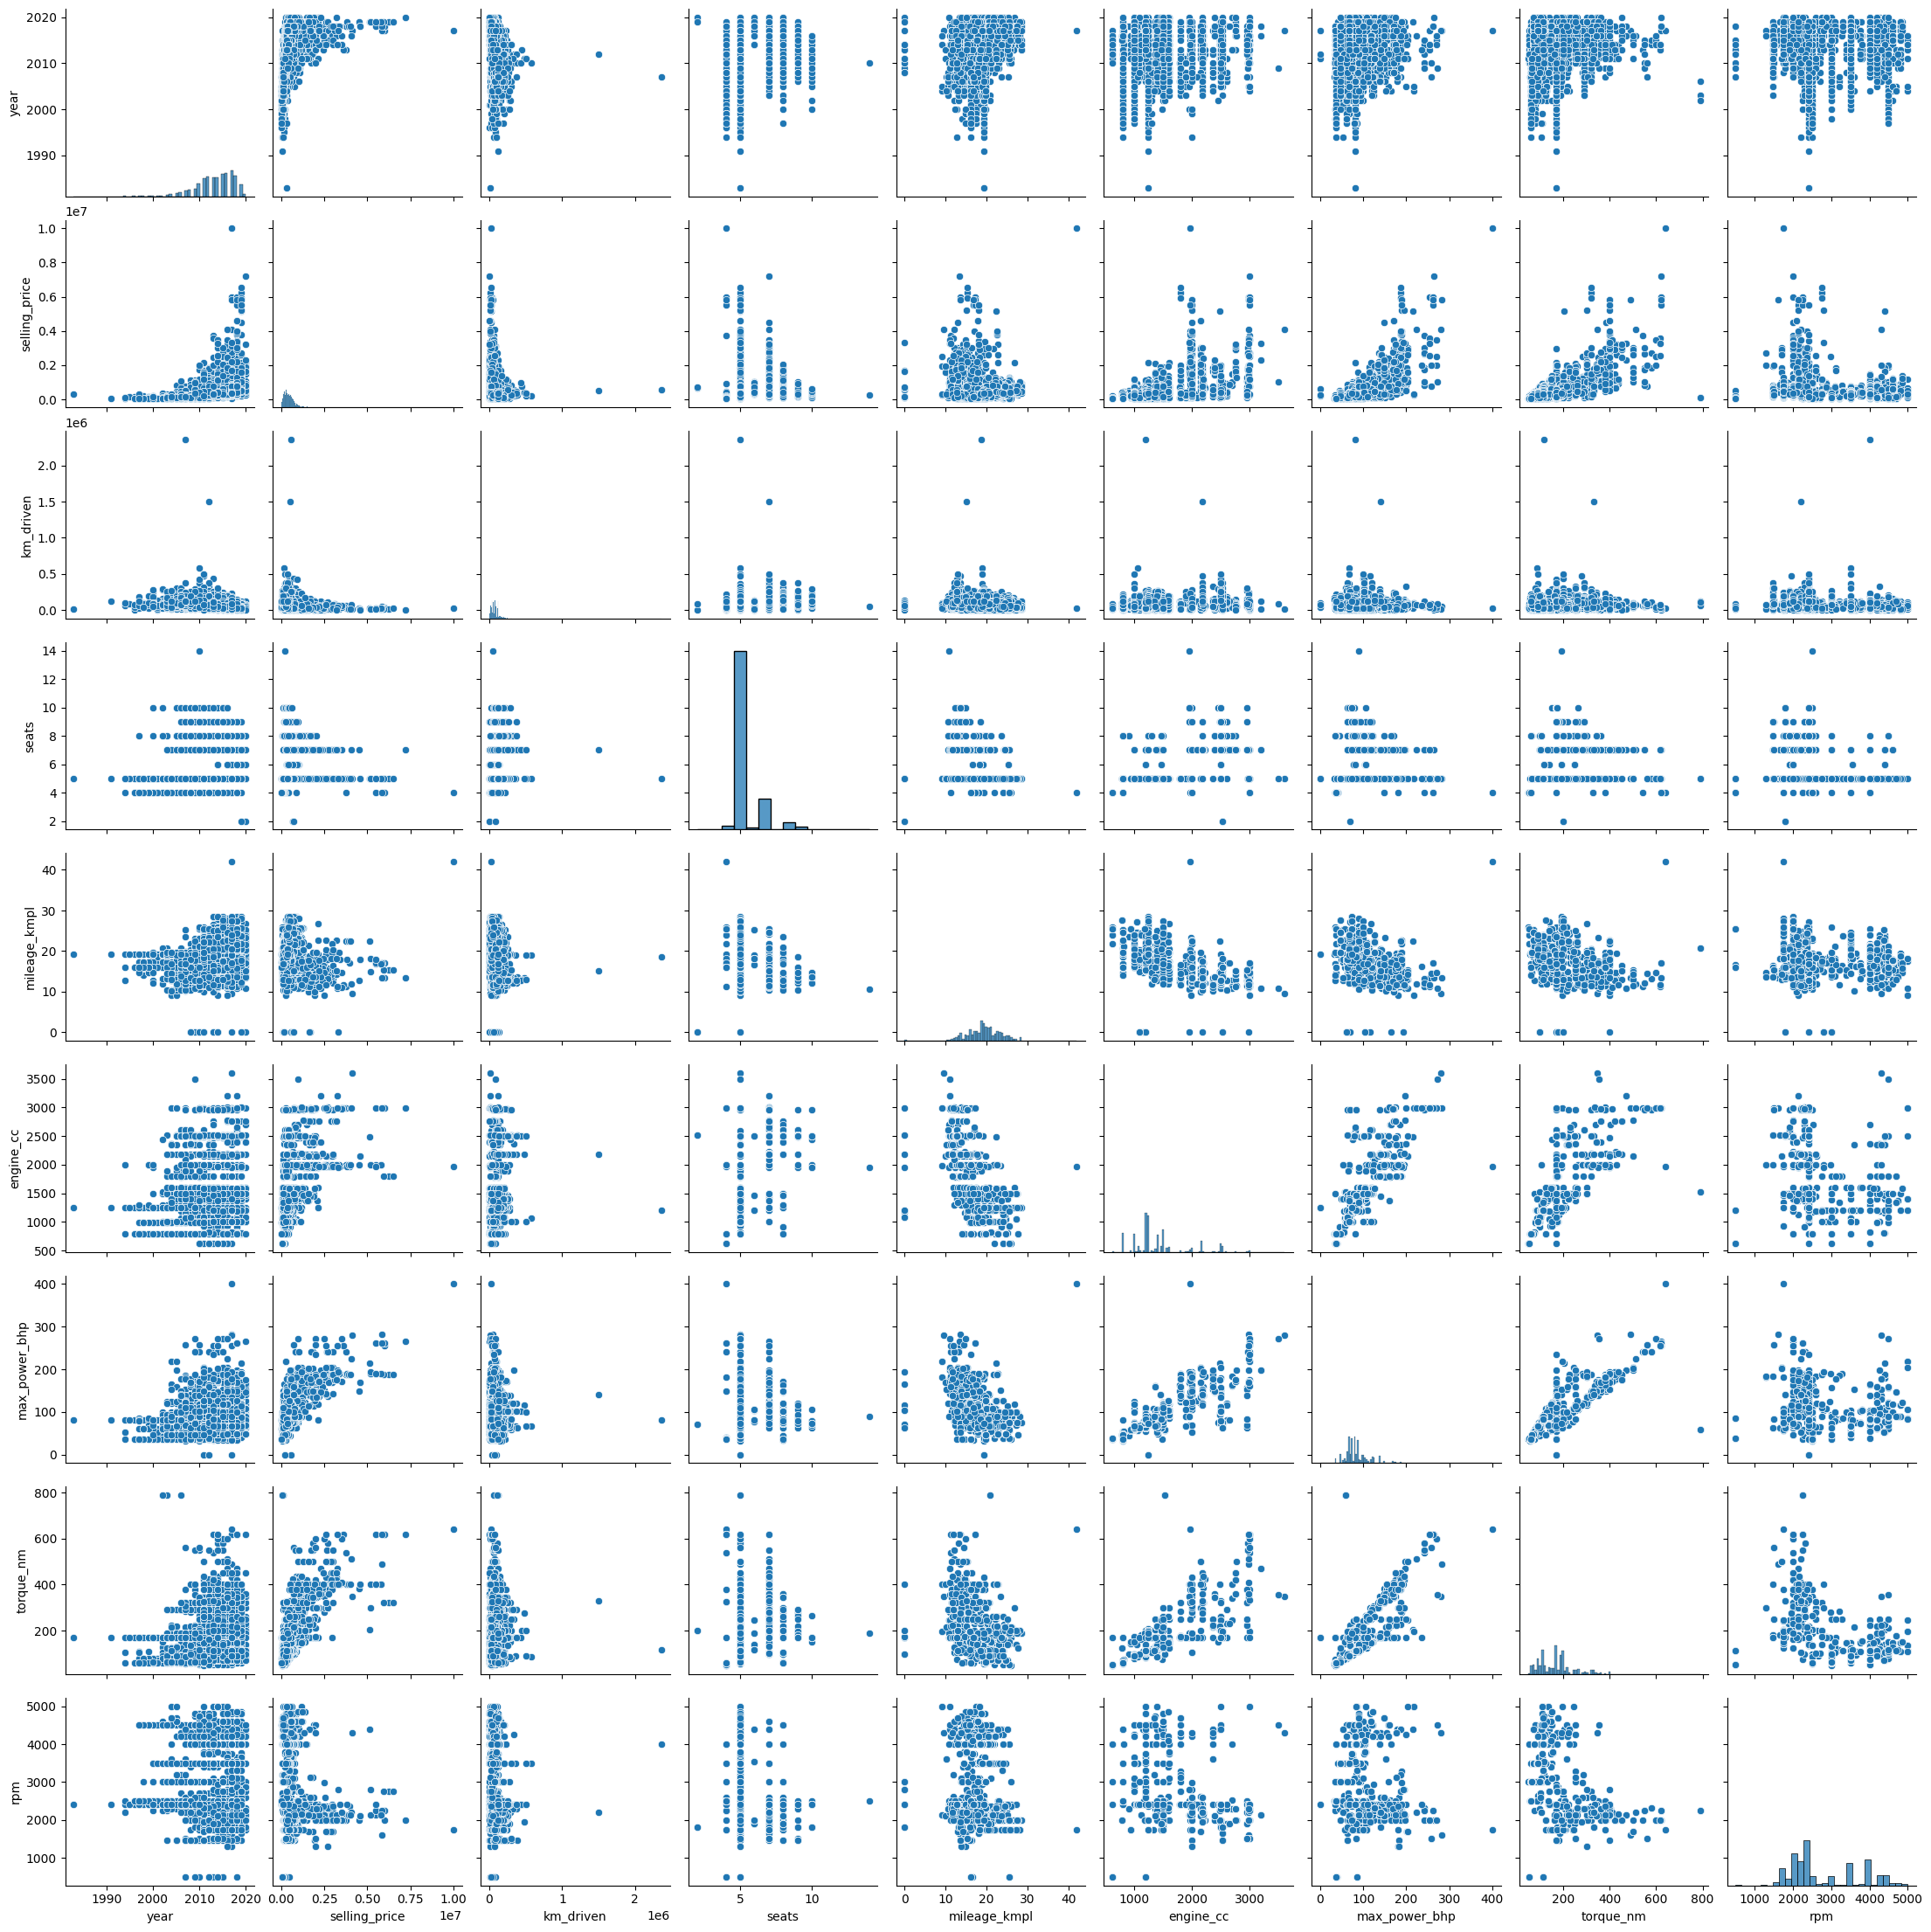

In [29]:
sns.pairplot(df_train.select_dtypes(include=['number']))

- Можно ли предположить на основе распределений связь признаков с целевой переменной?
    
    Ответ: Да, например, видно, что новые авто стоят дороже
- Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
    
    Ответ: Да, например, видно, что крутящий момент положительно коррелириует с количеством лошадиных сил

#### Шаг 2

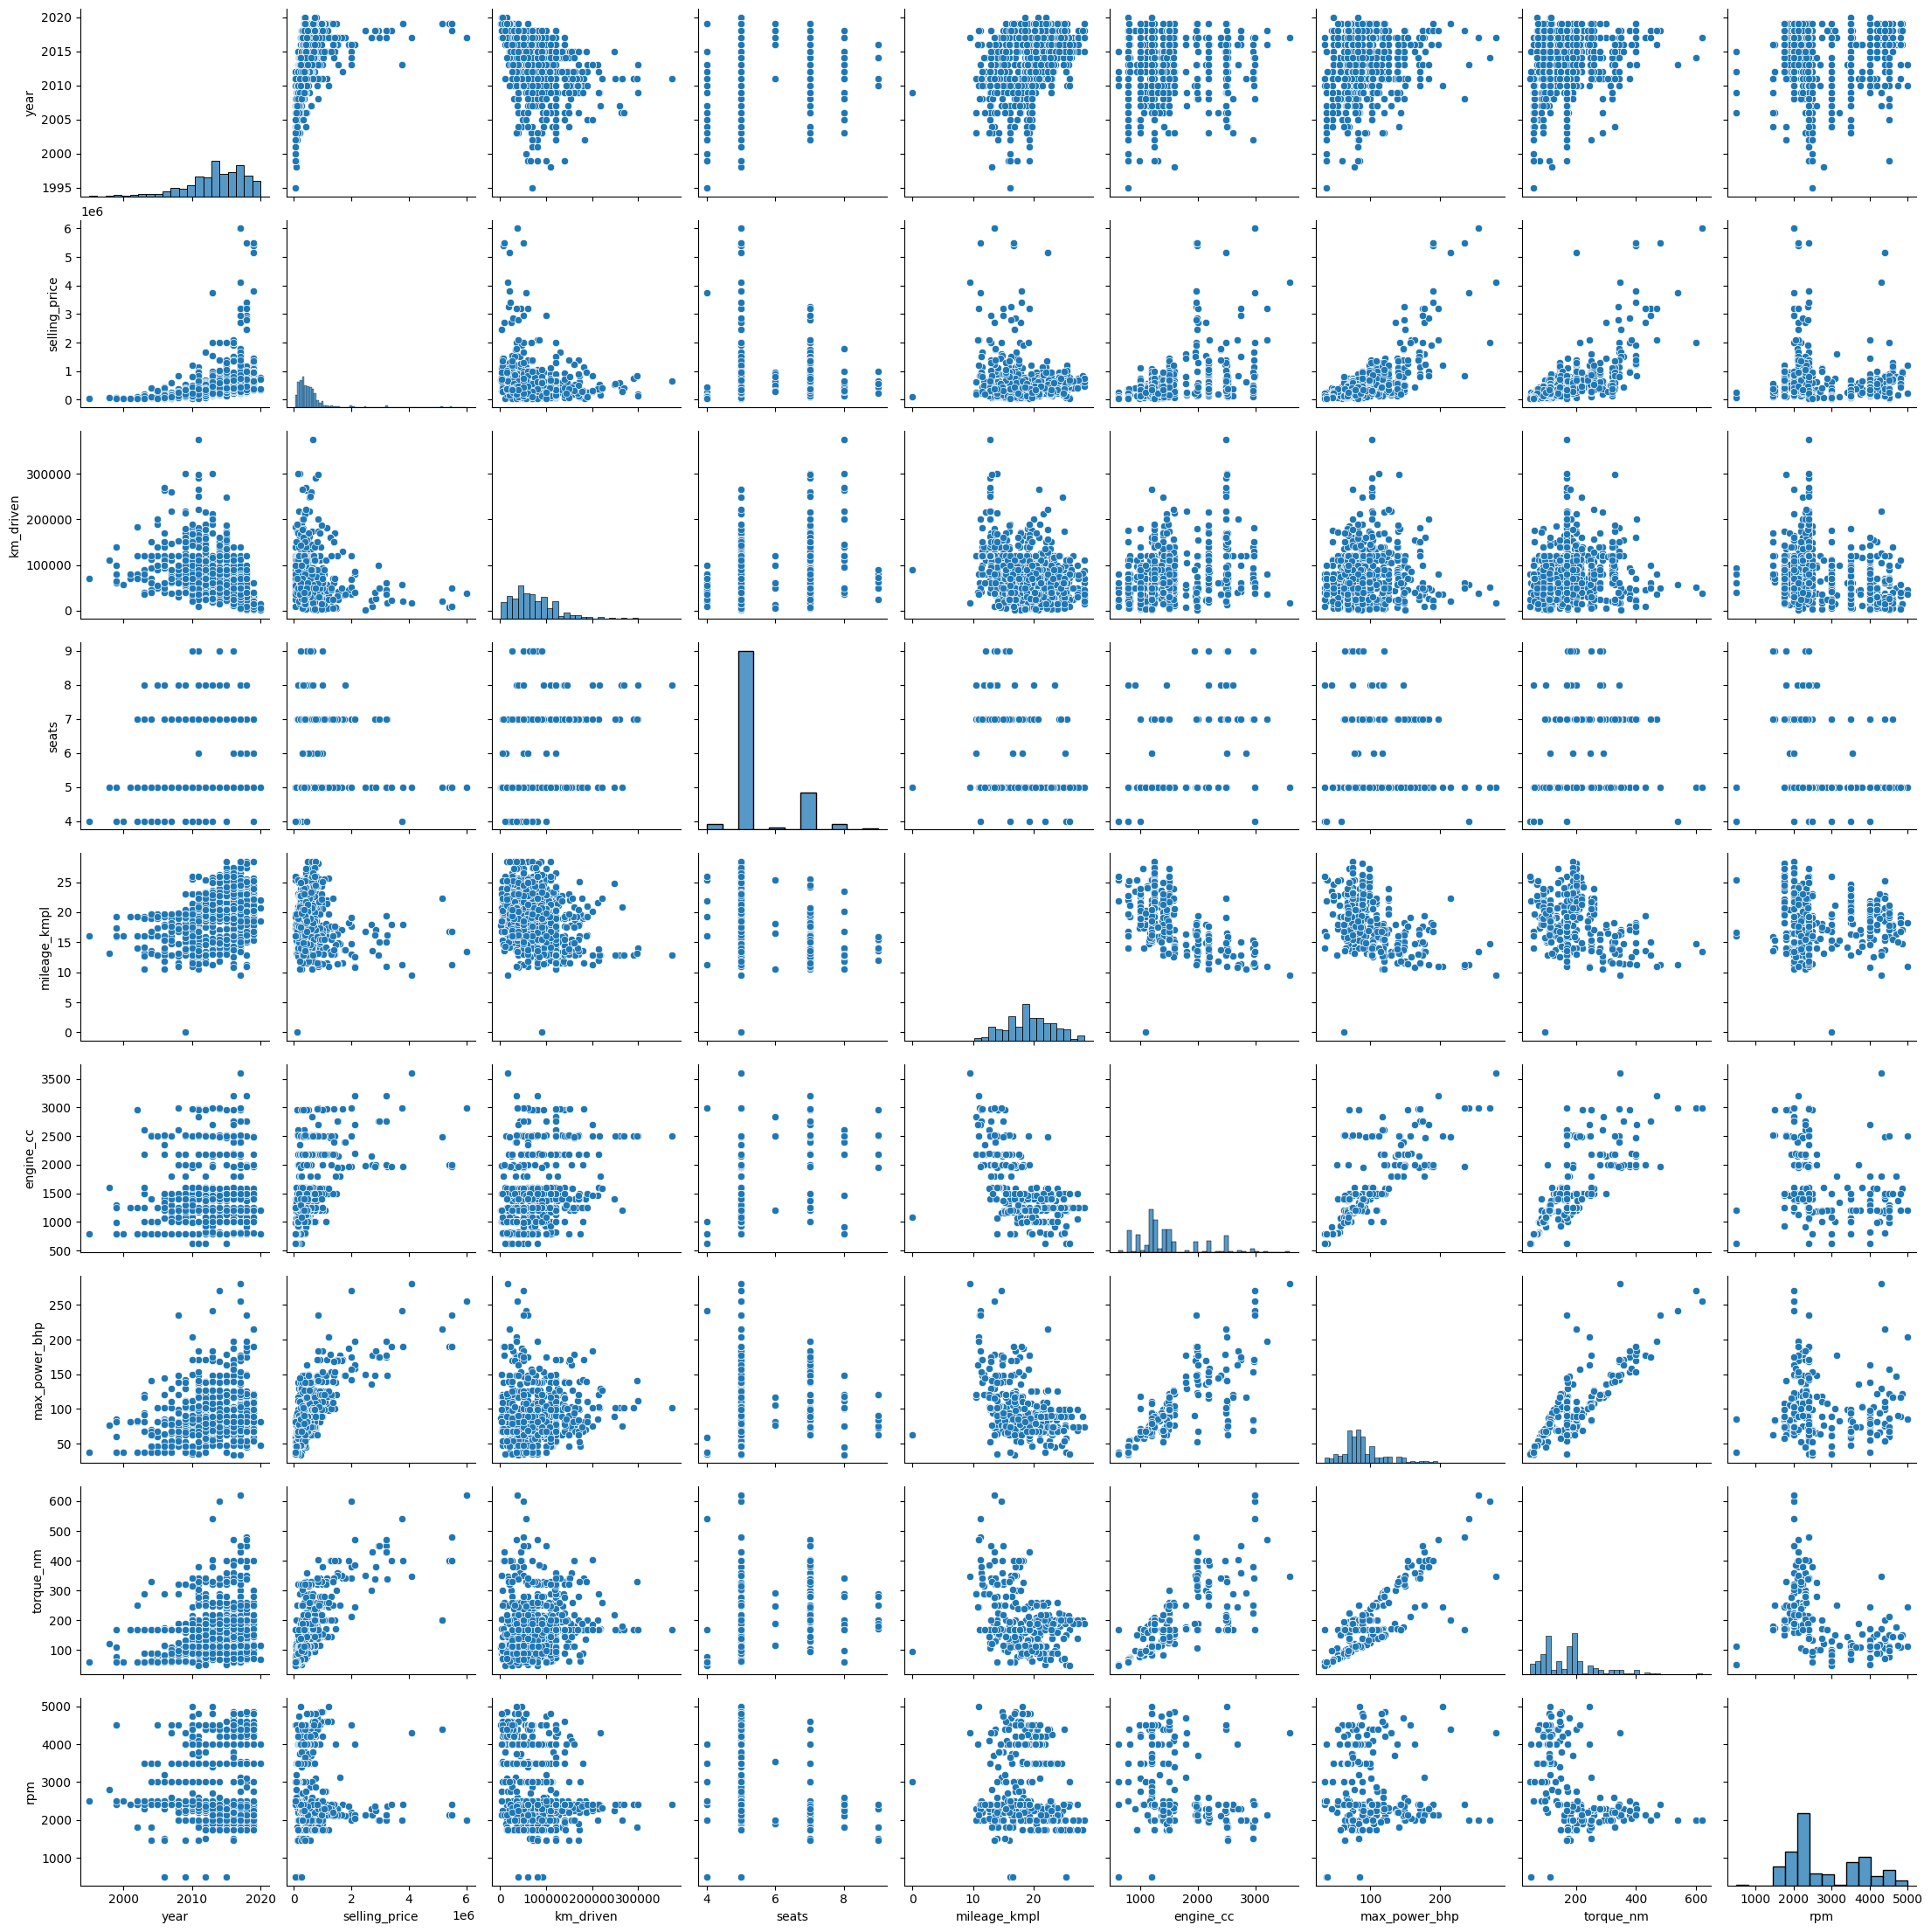

In [30]:
sns.pairplot(df_test.select_dtypes(include=['number']))

- Похожими ли оказались совокупности при разделении на трейн и тест?

    Ответ: Да

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [31]:
train_corr = df_train.corr(numeric_only=True)
display(train_corr)

,year,selling_price,km_driven,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_nm,rpm
year,1.000000,0.427279,-0.368966,0.041178,0.339232,0.002819,0.156648,0.119857,0.084301
selling_price,0.427279,1.000000,-0.164828,0.149953,-0.103673,0.447672,0.692754,0.618795,-0.161965
km_driven,-0.368966,-0.164828,1.000000,0.192328,-0.181574,0.229766,0.024630,0.126335,-0.247756
seats,0.041178,0.149953,0.192328,1.000000,-0.452696,0.652172,0.244060,0.357353,-0.285635
mileage_kmpl,0.339232,-0.103673,-0.181574,-0.452696,1.000000,-0.573593,-0.369633,-0.230706,-0.077736
engine_cc,0.002819,0.447672,0.229766,0.652172,-0.573593,1.000000,0.681082,0.718184,-0.389197
max_power_bhp,0.156648,0.692754,0.024630,0.244060,-0.369633,0.681082,1.000000,0.819772,-0.165273
torque_nm,0.119857,0.618795,0.126335,0.357353,-0.230706,0.718184,0.819772,1.000000,-0.569526
rpm,0.084301,-0.161965,-0.247756,-0.285635,-0.077736,-0.389197,-0.165273,-0.569526,1.000000


<Axes: >

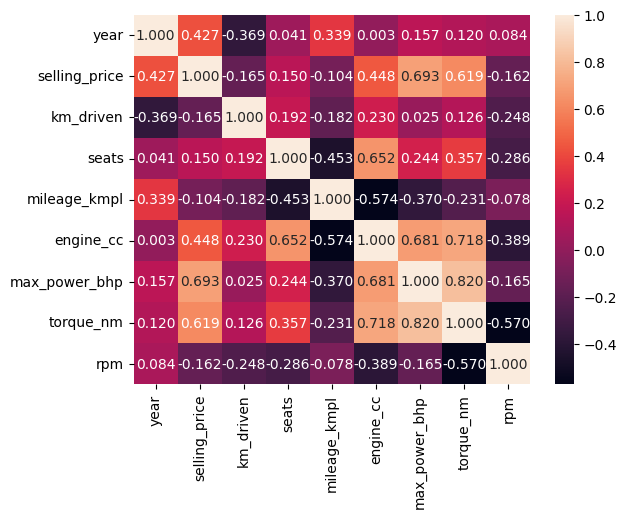

In [32]:
sns.heatmap(train_corr, annot=True, fmt='.3f')

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?

    Ответ: `year` и `engine_cc`
 - Между какими наблюдается довольно сильная положительная линейная зависимость?

    Ответ: `torque_nm` и `max_power_bhp`, `torque_nm` и `engine_cc`
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

    Ответ: Да

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Можно построить boxplots для оценки связи между категориальными признаками и целевой переменной

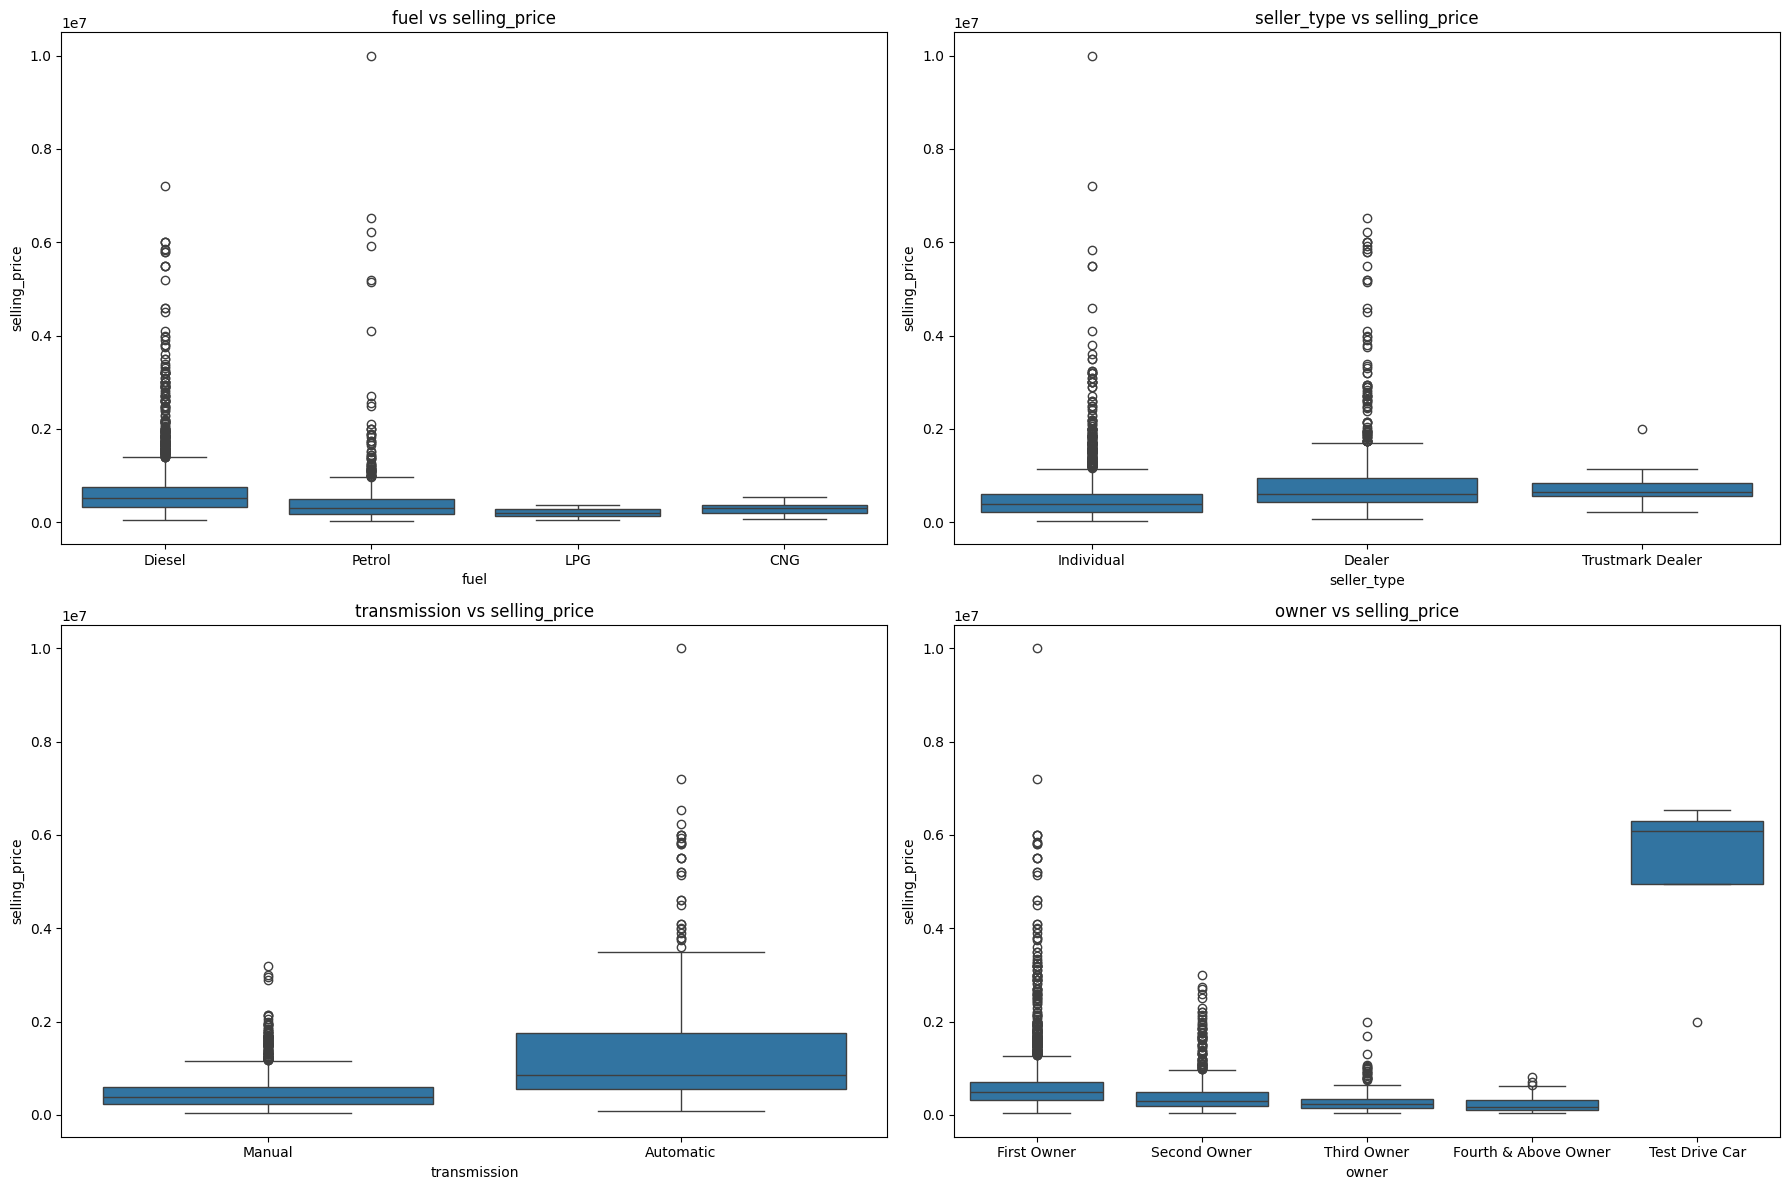

In [33]:
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_train[col], y=df_train['selling_price'])
    plt.title(f'{col} vs selling_price')

plt.tight_layout()
plt.show()

In [34]:
df_train.loc[df_train['owner'] == 'Test Drive Car']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_nm,rpm
3595,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,5,15.26,1798,187.740005,320.0,2750.0
3596,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,5,15.26,1798,187.740005,320.0,2750.0
3597,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,5,15.26,1798,187.740005,320.0,2750.0
4507,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,5,16.50,1799,139.460007,174.0,4300.0


Глядя на графики можно сделать следующие выводы:
- Дизельные автомобили в среднем дороже бензиновых. Автомобили на газу (CNG и LPG) дешевле дизельных и бензиновых.
- Автомобили от дилеров в среднем дороже, чем от частных лиц. Самые дорогие у Trustmark Dealer (доверенные продавцы (?)).
- Автомобили с автоматической коробкой передач в среднем дороже, чем с механической.
- Автомобили с меньшим количеством владельцев в среднем дороже, цена убывает по мере роста числа владельцев. Автомобили для тест-драйва в среднем сильно дороже, это связано с тем, что в тест дают довольно дорогие модели

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [35]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(include=['number']).drop(columns=['selling_price'])

In [36]:
# Изменил кол-во столбцов, т.к. обработал torque вместо удаления, и получилось 2 новых столбца (torque_nm, rpm) взамен одного
assert X_train.shape == (5840, 8)

In [37]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(include=['number']).drop(columns=['selling_price'])

In [38]:
# Изменил кол-во столбцов, т.к. обработал torque вместо удаления, и получилось 2 новых столбца (torque_nm, rpm) взамен одного
assert X_test.shape == (1000, 8)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [39]:
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

def fit_predict(model, X_train, y_train, X_test, y_test):
    if not isinstance(model, GridSearchCV):
        model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    return y_pred_train, y_pred_test

def calculate_and_show_metrics(y_pred_train, y_pred_test):
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    mse_train = MSE(y_train, y_pred_train)
    mse_test = MSE(y_test, y_pred_test)

    print(f'r2_train: {r2_train}, r2_test: {r2_test}')
    print(f'mse_train: {mse_train}, mse_test: {mse_test}')

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg_y_pred_train, lin_reg_y_pred_test = fit_predict(LinearRegression(), X_train, y_train, X_test, y_test)
calculate_and_show_metrics(lin_reg_y_pred_train, lin_reg_y_pred_test)

r2_train: 0.6028947566802918, r2_test: 0.6010337749987
mse_train: 113825587098.36537, mse_test: 229337178866.01987


$R^2$ у трейна и теста идентичные, что говорит об отсутствии переобучения, но качество модели оставляет желать лучшего

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
lin_reg_model = LinearRegression()
lin_reg_y_pred_train, lin_reg_y_pred_test = fit_predict(lin_reg_model, X_train_scaled, y_train, X_test_scaled, y_test)
calculate_and_show_metrics(lin_reg_y_pred_train, lin_reg_y_pred_test)

r2_train: 0.6028947566802916, r2_test: 0.6010337749987209
mse_train: 113825587098.36545, mse_test: 229337178866.0079


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

    Ответ: max_power_bhp

In [43]:
coefs = pd.DataFrame(lin_reg_model.coef_, X_train.columns, columns=['coef'])
coefs

,coef
year,166844.323805
km_driven,-49205.655306
seats,-33499.906040
mileage_kmpl,-12906.319156
engine_cc,12021.810643
max_power_bhp,273341.139800
torque_nm,76711.118363
rpm,-29998.472096


In [44]:
coefs.loc[coefs['coef'].abs().idxmax()]

coef    273341.1398
Name: max_power_bhp, dtype: float64

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.
    
    Ответ: Никакие веса не занулились. Это могло произойти из-за малого коэффициента регуляризации или из-за достаточной важности всех признаков

In [45]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_y_pred_train, lasso_y_pred_test = fit_predict(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)
calculate_and_show_metrics(lasso_y_pred_train, lasso_y_pred_test)

r2_train: 0.602894756631777, r2_test: 0.6010326044045129
mse_train: 113825587112.27158, mse_test: 229337851756.98575


In [46]:
pd.DataFrame(lasso_model.coef_, X_train.columns, columns=['coef'])

,coef
year,166841.946385
km_driven,-49204.697905
seats,-33495.831394
mileage_kmpl,-12903.000747
engine_cc,12019.711634
max_power_bhp,273342.156258
torque_nm,76711.690904
rpm,-29995.935511


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?

    Ответ: 50
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

    Ответ: 10. Веса снова не занулились

In [47]:
lasso_model = Lasso()

gs = GridSearchCV(
    lasso_model,
    param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]},
    scoring='neg_mean_squared_error',
    cv=10, n_jobs=-1
)
gs.fit(X_train_scaled, y_train)

gs.best_params_['alpha']

10

In [48]:
lasso_y_pred_train, lasso_y_pred_test = fit_predict(gs, X_train_scaled, y_train, X_test_scaled, y_test)
calculate_and_show_metrics(lasso_y_pred_train, lasso_y_pred_test)

r2_train: 0.6028947518266375, r2_test: 0.6010220708530263
mse_train: 113825588489.60878, mse_test: 229343906743.17245


In [49]:
pd.DataFrame(gs.best_estimator_.coef_, X_train.columns, columns=['coef'])

,coef
year,166820.546821
km_driven,-49196.078388
seats,-33459.131054
mileage_kmpl,-12873.132030
engine_cc,12000.778050
max_power_bhp,273351.419876
torque_nm,76716.737954
rpm,-29973.154625


**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?

    Ответ: 200
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

    Ответ: 'alpha': 0.01, 'l1_ratio': 0.01

In [64]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet()
gs = GridSearchCV(
    elastic_net_model,
    param_grid={
        'alpha': [0.01, 0.1, 0.5, 1, 10],
        'l1_ratio': [0.01, 0.1, 0.5, 1],
    },
    scoring='neg_mean_squared_error',
    cv=10, n_jobs=-1
)
gs.fit(X_train_scaled, y_train)

gs.best_params_

{'alpha': 0.01, 'l1_ratio': 0.01}

In [65]:
elastic_net_y_pred_train, elastic_net_y_pred_test = fit_predict(gs, X_train_scaled, y_train, X_test_scaled, y_test)
calculate_and_show_metrics(elastic_net_y_pred_train, elastic_net_y_pred_test)

r2_train: 0.6028110433974444, r2_test: 0.5993785941265148
mse_train: 113849582534.65924, mse_test: 230288624096.0985


In [66]:
pd.DataFrame(gs.best_estimator_.coef_, X_train.columns, columns=['coef'])

,coef
year,164937.668920
km_driven,-49625.478017
seats,-34220.731036
mileage_kmpl,-11806.049695
engine_cc,16100.324292
max_power_bhp,262605.378023
torque_nm,85323.381083
rpm,-25095.754193


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name` (`Предобработал`)

In [53]:
X_train_cat = df_train.drop(columns=['selling_price'])
X_test_cat = df_test.drop(columns=['selling_price'])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [x] Предобработайте столбец `name`, чтобы избежать его удаления

In [54]:
# Оставим в строках только марки автомобилей, чтобы усеньшить кол-во категорий
for X in (X_train_cat, X_test_cat):
    X['name'] = X['name'].apply(lambda x: x.split()[0])

In [55]:
# Изменил кол-во столбцов, т.к. обработал torque вместо удаления, и получилось 2 новых столбца (torque_nm, rpm) взамен одного
# Также обработал 'name'
assert X_train_cat.shape == (5840, 13)

In [56]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [58]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cat_features = X_train_cat.select_dtypes('object').columns.tolist() + ['seats']
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

train_encoded_features = ohe.fit_transform(pd.concat([X_train_cat.select_dtypes('object'), X_train_cat[['seats']]], axis=1))
test_encoded_features = ohe.transform(pd.concat([X_test_cat.select_dtypes('object'), X_test_cat[['seats']]], axis=1))

X_train_cat_encoded = pd.concat(
    [X_train_cat, pd.DataFrame(train_encoded_features.toarray(), columns=ohe.get_feature_names_out(cat_features))],
    axis=1
)
X_test_cat_encoded = pd.concat(
    [X_test_cat, pd.DataFrame(test_encoded_features.toarray(), columns=ohe.get_feature_names_out(cat_features))],
    axis=1
)

/Users/lev_k/HSE/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [59]:
X_train_cat_encoded.drop(columns=cat_features, inplace=True)
X_test_cat_encoded.drop(columns=cat_features, inplace=True)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

    Ответ: Получилось, сильно помогло сохранение и кодирование `name` с предобработкой (без этого результат был около 0.67)

In [60]:
scaler = StandardScaler()

X_train_cat_encoded_scaled = scaler.fit_transform(X_train_cat_encoded)
X_test_cat_encoded_scaled = scaler.transform(X_test_cat_encoded)

In [61]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_model = Ridge()

ridge_gs = GridSearchCV(
    ridge_model,
    param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]},
    scoring='r2',
    cv=10, n_jobs=-1
)
ridge_gs.fit(X_train_cat_encoded_scaled, y_train)

ridge_gs.best_params_['alpha']

0.01

In [62]:
ridge_y_pred_train, ridge_y_pred_test = fit_predict(ridge_gs, X_train_cat_encoded_scaled, y_train, X_test_cat_encoded_scaled, y_test)
calculate_and_show_metrics(ridge_y_pred_train, ridge_y_pred_test)

r2_train: 0.7806762082316921, r2_test: 0.794824094433143
mse_train: 62866607234.81888, mse_test: 117940969448.80629


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [67]:
def business_metric(y_true, y_pred):
    return np.mean((np.abs(y_true - y_pred) / y_true) <= 0.1)

print(f'Linear regression: {business_metric(y_test, lin_reg_y_pred_test)}')
print(f'Lasso: {business_metric(y_test, lasso_y_pred_test)}')
print(f'Elastic Net: {business_metric(y_test, elastic_net_y_pred_test)}')
print(f'Ridge regression: {business_metric(y_test, ridge_y_pred_test)}')


Linear regression: 0.245
Lasso: 0.245
Elastic Net: 0.248
Ridge regression: 0.302


Лучше всего задачу бизнеса решает Гребневая регрессия

In [66]:
# Сборка и сохранение пайплайна для последующего использования

import joblib
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = X_train_cat.select_dtypes('object').columns.tolist() + ['seats']
num_features = X_train_cat.select_dtypes(exclude='object').columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), num_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('ridge', Ridge(alpha=ridge_gs.best_params_['alpha']))
])
pipeline.fit(X_train_cat, y_train)

joblib.dump(pipeline, 'ridge_pipline.pkl')

['ridge_pipline.pkl']

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ! (Это кот `Елены`?)

[Первый кот](https://ibb.co/XbnpCTg)

</details>

